In [1]:

import tensorflow as tf
import pandas as pd
from tensorflow import keras
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.1


In [2]:
#TRAIN_DATA_URL = "https://raw.githubusercontent.com/beaucarnes/fcc_python_curriculum/master/sms/train-data.tsv"
#TEST_DATA_URL = "https://raw.githubusercontent.com/beaucarnes/fcc_python_curriculum/master/sms/valid-data.tsv"

#train_file_path = tf.keras.utils.get_file("train-data.tsv", TRAIN_DATA_URL)
#test_file_path = tf.keras.utils.get_file("valid-data.tsv", TEST_DATA_URL)

In [3]:
df1 = pd.read_csv("https://raw.githubusercontent.com/beaucarnes/fcc_python_curriculum/master/sms/train-data.tsv", sep ='\t',names=["label", "message"])

df2= pd.read_csv("https://raw.githubusercontent.com/beaucarnes/fcc_python_curriculum/master/sms/valid-data.tsv", sep ='\t',names=["label", "message"])

In [4]:
ham_msg = df1[df1.label =='ham']
spam_msg = df1[df1.label=='spam']
# Create numpy list to visualize using wordcloud
ham_msg_text = " ".join(ham_msg.message.to_numpy().tolist())
spam_msg_text = " ".join(spam_msg.message.to_numpy().tolist())

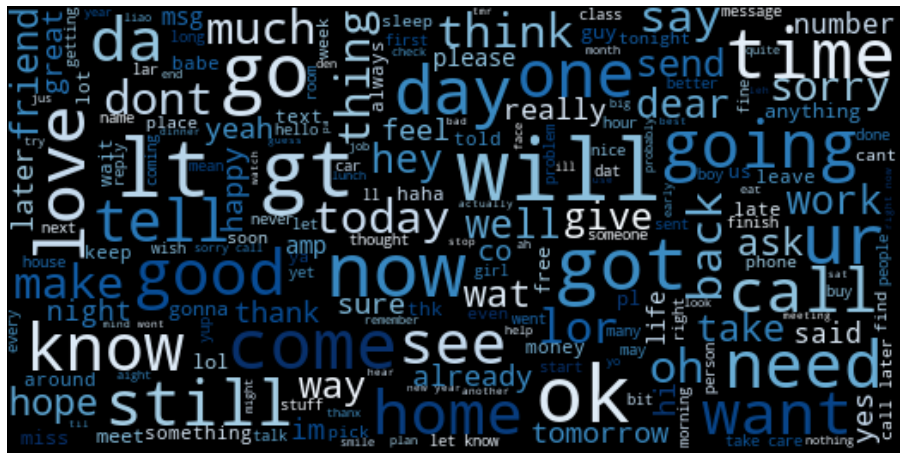

In [5]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline
ham_msg_cloud = WordCloud(width =520, height =260, stopwords=STOPWORDS,max_font_size=50, background_color ="black", colormap='Blues').generate(ham_msg_text)
plt.figure(figsize=(16,10))
plt.imshow(ham_msg_cloud, interpolation='bilinear')
plt.axis('off') # turn off axis
plt.show()

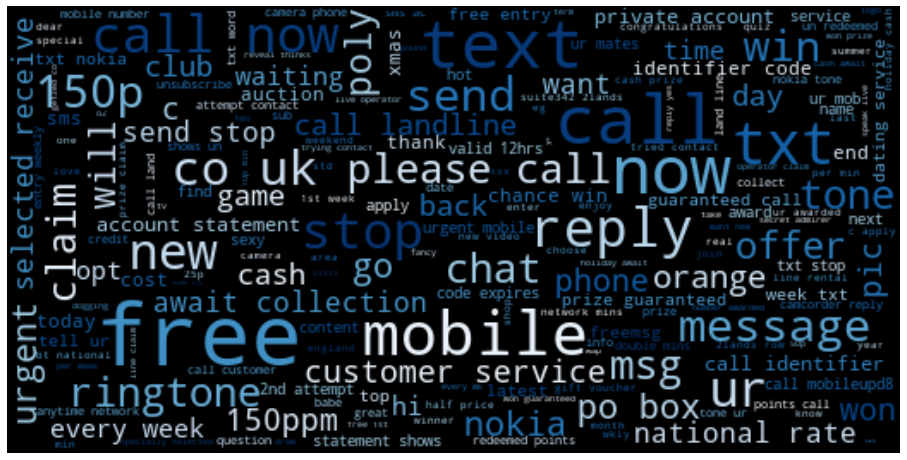

In [6]:
spam_msg_cloud = WordCloud(width =520, height =260, stopwords=STOPWORDS,max_font_size=50, background_color ="black", colormap='Blues').generate(spam_msg_text)
plt.figure(figsize=(16,10))
plt.imshow(spam_msg_cloud, interpolation='bilinear')
plt.axis('off') # turn off axis
plt.show()

In [7]:
ham_msg

,label,message
0,ham,ahhhh...just woken up!had a bad dream about u ...
1,ham,you can never do nothing
2,ham,"now u sound like manky scouse boy steve,like! ..."
3,ham,mum say we wan to go then go... then she can s...
4,ham,never y lei... i v lazy... got wat? dat day ü ...
...,...,...
4172,ham,"not yet chikku..going to room nw, i'm in bus.."
4173,ham,"tell you what, if you make a little spreadshee..."
4174,ham,just woke up. yeesh its late. but i didn't fal...
4175,ham,what do u reckon as need 2 arrange transport i...


In [8]:
ham_msg_df = ham_msg.sample(n = len(spam_msg), random_state = 44)
spam_msg_df = spam_msg
print(ham_msg_df.shape, spam_msg_df.shape)

(560, 2) (560, 2)


In [9]:
msg_df = ham_msg_df.append(spam_msg_df).reset_index(drop=True)

In [11]:
msg_df['label']= msg_df['label'].map({'ham': 0, 'spam': 1})

In [12]:
msg_df

,label,message
0,0,i want to go to perumbavoor
1,0,hi:)did you asked to waheeda fathima about leave?
2,0,get down in gandhipuram and walk to cross cut ...
3,0,hey leave it. not a big deal:-) take care.
4,0,dude got a haircut. now its breezy up there
...,...,...
1115,1,free msg: single? find a partner in your area!...
1116,1,free2day sexy st george's day pic of jordan!tx...
1117,1,you are a winner you have been specially selec...
1118,1,free entry into our £250 weekly competition ju...


In [13]:
df2['label']= df2['label'].map({'ham': 0, 'spam': 1})

In [14]:
msg1=msg_df['message'].values
msg2=df2['message'].values



In [15]:
msg1


array(['i want to go to perumbavoor',
       'hi:)did you asked to waheeda fathima about leave?',
       'get down in gandhipuram and walk to cross cut road. right side &lt;#&gt; street road and turn at first right.',
       ...,
       'you are a winner you have been specially selected to receive £1000 cash or a £2000 award. speak to a live operator to claim call 087147123779am-7pm. cost 10p',
       'free entry into our £250 weekly competition just text the word win to 80086 now. 18 t&c www.txttowin.co.uk',
       '-pls stop bootydelious (32/f) is inviting you to be her friend. reply yes-434 or no-434 see her: www.sms.ac/u/bootydelious stop? send stop frnd to 62468'],
      dtype=object)

In [16]:
max_len = 70
trunc_type = "post" 
padding_type = "post" 
oov_tok = "<OOV>" 
vocab_size = 500

In [17]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(num_words = vocab_size, char_level=False, oov_token = oov_tok)
tokenizer.fit_on_texts(msg_df['message'])

In [18]:
word_index = tokenizer.word_index
word_index

{'<OOV>': 1,
 'to': 2,
 'you': 3,
 'a': 4,
 'i': 5,
 'call': 6,
 'the': 7,
 'your': 8,
 'u': 9,
 'for': 10,
 'now': 11,
 'is': 12,
 'and': 13,
 'free': 14,
 'or': 15,
 '2': 16,
 'in': 17,
 'have': 18,
 'on': 19,
 'of': 20,
 'ur': 21,
 'txt': 22,
 'are': 23,
 '4': 24,
 'with': 25,
 'from': 26,
 'me': 27,
 'get': 28,
 'just': 29,
 'mobile': 30,
 'this': 31,
 'my': 32,
 'text': 33,
 'stop': 34,
 'it': 35,
 'reply': 36,
 'no': 37,
 'www': 38,
 'be': 39,
 'will': 40,
 'we': 41,
 'do': 42,
 'only': 43,
 'not': 44,
 'so': 45,
 'out': 46,
 'claim': 47,
 'our': 48,
 'that': 49,
 'send': 50,
 'go': 51,
 'up': 52,
 'new': 53,
 'at': 54,
 'prize': 55,
 "i'm": 56,
 'if': 57,
 'week': 58,
 't': 59,
 'nokia': 60,
 'can': 61,
 'been': 62,
 'cash': 63,
 'uk': 64,
 '150p': 65,
 'all': 66,
 'win': 67,
 'how': 68,
 'know': 69,
 'com': 70,
 'but': 71,
 'when': 72,
 'day': 73,
 'co': 74,
 'won': 75,
 '1': 76,
 'tone': 77,
 'phone': 78,
 'who': 79,
 '50': 80,
 'time': 81,
 'service': 82,
 'back': 83,
 'by': 

In [19]:
tot_words = len(word_index)
print('There are %s unique tokens in training data. ' % tot_words)

There are 3999 unique tokens in training data. 


In [20]:
training_sequences = tokenizer.texts_to_sequences(msg_df['message'])
training_padded = pad_sequences (training_sequences, maxlen = max_len, padding = padding_type, truncating = trunc_type )
testing_sequences = tokenizer.texts_to_sequences(df2['message'])
testing_padded = pad_sequences(testing_sequences, maxlen = max_len,padding = padding_type, truncating = trunc_type)

In [35]:
print(training_padded[1])

[ 86 172   3   1   2   1   1 160 484   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]


In [22]:
print('Shape of training tensor: ', training_padded.shape)
print('Shape of testing tensor: ', testing_padded.shape)

Shape of training tensor:  (1120, 70)
Shape of testing tensor:  (1392, 70)


In [23]:
vocab_size = len(tokenizer.word_index) + 1 # As defined earlier
embeding_dim = 24
drop_value = 0.2 # dropout
n_dense = 24

In [24]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense, Dropout, LSTM, Bidirectional
model = Sequential()
model.add(Embedding(vocab_size, embeding_dim, input_length=max_len))
model.add(GlobalAveragePooling1D())
model.add(Dense(24, activation='relu'))
model.add(Dropout(drop_value))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam' ,metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 70, 24)            96000     
_________________________________________________________________
global_average_pooling1d (Gl (None, 24)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                600       
_________________________________________________________________
dropout (Dropout)            (None, 24)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 96,625
Trainable params: 96,625
Non-trainable params: 0
_________________________________________________________________


In [26]:
num_epochs = 30
early_stop = EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(training_padded, msg_df['label'], epochs=num_epochs, validation_data=(testing_padded, df2['label']),callbacks =[early_stop], verbose=2)

Epoch 1/30
35/35 - 1s - loss: 0.6896 - accuracy: 0.5938 - val_loss: 0.6771 - val_accuracy: 0.9203
Epoch 2/30
35/35 - 0s - loss: 0.6740 - accuracy: 0.8518 - val_loss: 0.6524 - val_accuracy: 0.9116
Epoch 3/30
35/35 - 0s - loss: 0.6400 - accuracy: 0.8839 - val_loss: 0.5974 - val_accuracy: 0.9102
Epoch 4/30
35/35 - 0s - loss: 0.5783 - accuracy: 0.8786 - val_loss: 0.5114 - val_accuracy: 0.9102
Epoch 5/30
35/35 - 0s - loss: 0.4942 - accuracy: 0.9045 - val_loss: 0.4403 - val_accuracy: 0.9001
Epoch 6/30
35/35 - 0s - loss: 0.4037 - accuracy: 0.9089 - val_loss: 0.3493 - val_accuracy: 0.9102
Epoch 7/30
35/35 - 0s - loss: 0.3198 - accuracy: 0.9179 - val_loss: 0.2808 - val_accuracy: 0.9260
Epoch 8/30
35/35 - 0s - loss: 0.2721 - accuracy: 0.9277 - val_loss: 0.2559 - val_accuracy: 0.9239
Epoch 9/30
35/35 - 0s - loss: 0.2287 - accuracy: 0.9393 - val_loss: 0.2233 - val_accuracy: 0.9296
Epoch 10/30
35/35 - 0s - loss: 0.2030 - accuracy: 0.9446 - val_loss: 0.1782 - val_accuracy: 0.9432
Epoch 11/30
35/35 -

In [27]:
model.evaluate(testing_padded, df2['label'])

44/44 [==============================] - 0s 1ms/step - loss: 0.1195 - accuracy: 0.9662


[0.11945514380931854, 0.9662356376647949]

In [28]:
n_lstm = 20
drop_lstm =0.2
model1 = Sequential()
model1.add(Embedding(vocab_size, embeding_dim, input_length=max_len))
model1.add(LSTM(n_lstm, dropout=drop_lstm, return_sequences=True))
model1.add(LSTM(n_lstm, dropout=drop_lstm, return_sequences=True))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [31]:
num_epochs = 30
early_stop = EarlyStopping(monitor='val_loss', patience=2)
history = model1.fit(training_padded, msg_df['label'], epochs=num_epochs, validation_data=(testing_padded, df2['label']),callbacks =[early_stop], verbose=2)

Epoch 1/30
35/35 - 2s - loss: 0.1889 - accuracy: 0.9418 - val_loss: 0.1640 - val_accuracy: 0.9610
Epoch 2/30
35/35 - 2s - loss: 0.1372 - accuracy: 0.9589 - val_loss: 0.2413 - val_accuracy: 0.9417
Epoch 3/30
35/35 - 2s - loss: 0.1173 - accuracy: 0.9639 - val_loss: 0.2679 - val_accuracy: 0.9367


In [32]:
model1.evaluate(testing_padded, df2['label'])

44/44 [==============================] - 1s 11ms/step - loss: 0.2679 - accuracy: 0.9367


[0.2678552567958832, 0.9366993308067322]

In [33]:
# function to predict messages based on model
# (should return list containing prediction and label, ex. [0.008318834938108921, 'ham'])
def predict_message(pred_text):
    
    
    new_seq = tokenizer.texts_to_sequences([pred_text])
    pad = pad_sequences (new_seq, maxlen = max_len, padding = padding_type, truncating = trunc_type )
  

   
    answer=model.predict(pad)

    #prediction=[]
    result=""
    if answer[0]*100<5:
        result="ham"
    else:
        result="spam"

    #prediction.append(result)
   



    return (answer,result)

pred_text = "ball is not good"

prediction = predict_message(pred_text)
print(prediction)

(array([[0.02335775]], dtype=float32), 'ham')


In [34]:
# Run this cell to test your function and model. Do not modify contents.
def test_predictions():
    
    test_messages = ["how are you doing today",
                   "sale today! to stop texts call 98912460324",
                   "i dont want to go. can we try it a different day? available sat",
                   "our new mobile video service is live. just install on your phone to start watching.",
                   "you have won £1000 cash! call to claim your prize.",
                   "i'll bring it tomorrow. don't forget the milk.",
                   "wow, is your arm alright. that happened to me one time too"
                  ]

    test_answers = ["ham", "spam", "ham", "spam", "spam", "ham", "ham"]
    passed = True
  

    for msg, ans in zip(test_messages, test_answers):
        
    
        prediction = predict_message(msg)
        print(prediction)
  
        if prediction[1] != ans:
          passed = False

    if passed:
        print("You passed the challenge. Great job!")
    else:
        print("You haven't passed yet. Keep trying.")

test_predictions()


(array([[0.01374885]], dtype=float32), 'ham')
(array([[0.39793205]], dtype=float32), 'spam')
(array([[0.01174694]], dtype=float32), 'ham')
(array([[0.96733755]], dtype=float32), 'spam')
(array([[0.9475699]], dtype=float32), 'spam')
(array([[0.01251298]], dtype=float32), 'ham')
(array([[0.04536083]], dtype=float32), 'ham')
You passed the challenge. Great job!
